In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Testing NLP - Sentiment Analysis using TextBlob
TextBlob("The movie is good").sentiment



Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [3]:
TextBlob("aw").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [4]:
TextBlob("The movie is disguisting, worse i have ever saw in my life").sentiment

Sentiment(polarity=-0.4, subjectivity=0.6)

In [5]:
#Importing YouTube comments data
comm = pd.read_csv('UScomments.csv',encoding='utf8',error_bad_lines=False);#opening the file UScomments

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


In [6]:
#Importing YouTube comments data
comm = pd.read_csv('UScomments.csv',encoding='utf8',error_bad_lines=False);#opening the file UScomments

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


In [7]:
comm.shape

(691400, 4)

In [8]:
#Displaying the first 5 rows of the data
comm.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your vine channel and have seen all 365 vlogs,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [9]:
#Extracting 1000 random samples from the data
comm = comm.sample(2000)
comm.shape

(2000, 4)

In [10]:
pol=[] # list which will contain the polarity of the comments
for i in comm.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)

In [11]:
#Adding the Sentiment Polarity column to the data
comm['pol']=pol

In [12]:
comm['pol'][comm.pol==0]= 0
comm['pol'][comm.pol > 0]= 1
comm['pol'][comm.pol < 0]= -1

In [13]:
#Displaying the POSITIVE comments
df_positive = comm[comm.pol==1]
df_positive.head(10)

,video_id,comment_text,likes,replies,pol
523149,dJ_p4Z_yVpM,"This dance of Armie and Timmy will become a real classic you know, like singing in the rain or la la land:))",0,0,1.0
604486,Wp2TUPo5W0c,"Ily Dan, you're amazing. Can relate to this so much. If you've ever had any experience with anxiety, or even self harm that'd be something I'd appreciate hearing about. Hope things progress and g...",0,0,1.0
559217,M3siIx0W8aM,this is very very smilar to the All I Want video,0,1,1.0
283807,MHMdv2D7ndc,god fucking bless you. i’m so proud. you are loved.,0,0,1.0
511271,IRdrt8nPyy8,I'M SO EXCITED,0,0,1.0
383222,AaGVAaGylgQ,Tamar I love your outfit! I can see you have matured a lot.,0,0,1.0
350183,gDf4RpaMFrk,"Wow, pretty much spot on!!",1,1,1.0
414328,is7Hx7B5e2c,Mark was born to Jive he always has some great choreo for this dance! <3,35,0,1.0
231824,SNCeopgkSAU,"Atlanta yes...I wish this had its time, plus took over Dallas's time.....that would be soooooo good.",0,0,1.0
129272,wGwsgf5CdxU,I can't count how many times 7 has been called safe and now that safe is bad you say he took a lot of risks. Whether you're right or wrong be consistent. \nNot making a stance on the petition.,0,0,1.0


In [14]:
#Displaying the NEGATIVE comments
df_positive = comm[comm.pol==-1]
df_positive.head(10)


,video_id,comment_text,likes,replies,pol
299017,439iY0844xI,very naive overthinking,0,0,-1.0
491268,Y61Q5w8qdSw,Stop wtf,1,0,-1.0
590549,vOkzPTAZ8-E,wtf,0,0,-1.0
52188,RJuqdTXhDX4,sorry but im on iphone xxxxxxxxxl s color c,0,0,-1.0
184286,JPTB93NS_8M,Hola random person scrolling through the coments!,0,0,-1.0
156796,f8Ej3RVz-Bk,"I go berserk when I hear half of the US voted for Trump! No they didn’t!! On 11/8/17 there were 230.5 million eligible voters in the US, only 62.9 million of them voted for Trump (about 27%). Thos...",0,0,-1.0
203523,lUFpahcEOX8,Stalling democracy may strikes again.\nGet this horrific woman out now.,3,0,-1.0
25696,Ez95rPffd8k,"You should not be sad for him, I'm sad for you and your audience that doesn't get it. The rest of the world needs to catch up with the wisdom he is sharing.",0,0,-1.0
370466,-otJ1LJGzcc,REPEAT AFTER ME! the shooter is a terrorist...not an elderly mentally unstable white male....he is a terrorist.,2,0,-1.0
61744,-Ifnaxi2LQg,This is boring I was here to see this two chicks do something amazing but it wasn't even meh,0,0,-1.0


In [15]:
#Displaying the NEUTRAL comments
df_positive = comm[comm.pol==0]
df_positive.head(10)

,video_id,comment_text,likes,replies,pol
31287,_GC5AVsf528,"Hey, its Kurt Cobain.",0,0,0.0
137968,oqmSuPJfvJo,Where is the recipe?,0,0,0.0
525883,bpDylTwwunc,Damn she got a fat ass,0,0,0.0
595290,0hLx_1Q15eY,"Oh I thought this was about drugs like cocine, meth or others",0,0,0.0
643008,MiQYQQcG1HQ,Trivago,0,0,0.0
101211,zcqZHYo7ONs,I got blocked at a,0,0,0.0
395516,9sjLzdix70w,They. all need. fired,0,0,0.0
144075,Tm8LGxTLtQk,Rest in peace,0,0,0.0
547844,FUBXKn1oP0g,Can you do an undertale costume please,0,0,0.0
237280,OCCKNCvNbkc,Shane looks so nervous,0,0,0.0


 0.0    856
 1.0    839
-1.0    305
Name: pol, dtype: int64

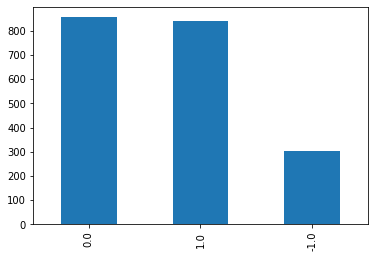

In [16]:
comm.pol.value_counts().plot.bar()
comm.pol.value_counts()
